# Telco Customer Churn

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df = df.dropna()

In [18]:
df[['TotalCharges']].info()
df['TotalCharges'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


np.int64(0)

In [19]:
null_v = df.isnull().sum()
print(null_v)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [20]:
from sklearn.preprocessing import LabelEncoder

cat_columns = [col for col in df.columns if df[col].dtype == 'object']
le = LabelEncoder()

for col in cat_columns:
    df[col] = le.fit_transform(df[col])


In [21]:
print(cat_columns)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
dup = df['customerID'].value_counts()
dup_values = dup[dup>1]
print(dup_values)

Series([], Name: count, dtype: int64)


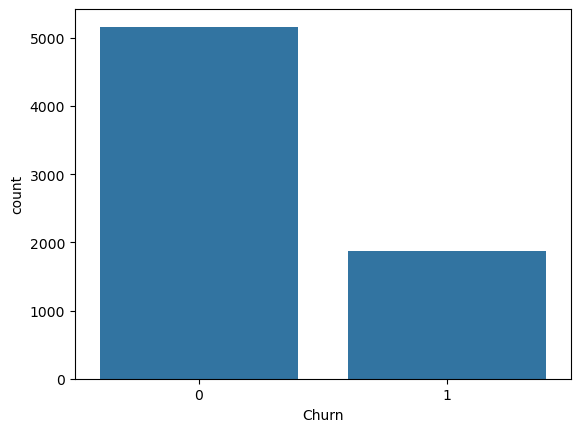

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['Churn'])
plt.show()

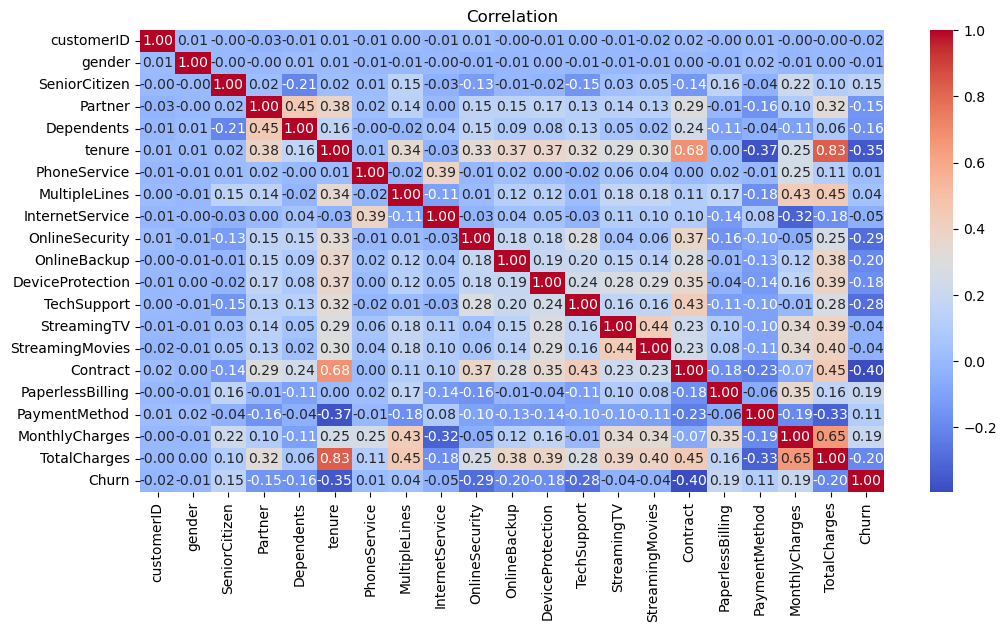

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation')
plt.show()

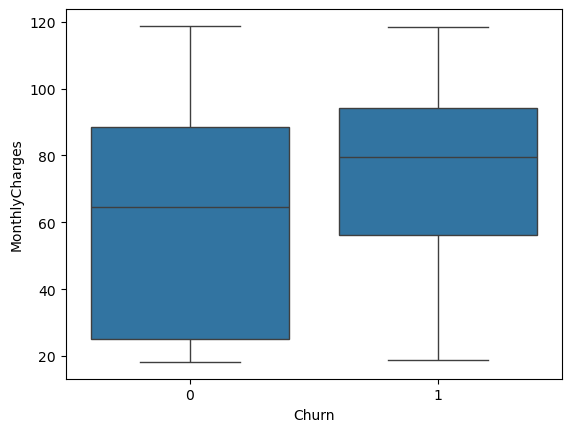

In [26]:
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'])
plt.show()

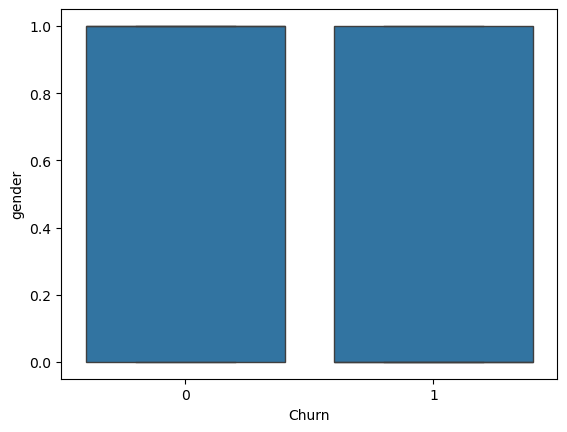

In [27]:
sns.boxplot(x=df['Churn'], y=df['gender'])
plt.show()

In [28]:
dup = df['gender'].value_counts()
dup_v = dup[dup >1]
print(dup_v)

gender
1    3549
0    3483
Name: count, dtype: int64


In [29]:
df["tenure_group"] = pd.cut(df["tenure"], bins=[0, 12, 48, 100], labels=["Short", "Medium", "Long"])
df["Charge_per_tenure"] = df["TotalCharges"] / (df["tenure"] + 1)


In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,Charge_per_tenure
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,29.85,0,Short,14.925000
1,3953,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1889.50,0,Medium,53.985714
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,108.15,1,Short,36.050000
3,5524,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,42.30,1840.75,0,Medium,40.016304
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,Short,50.550000


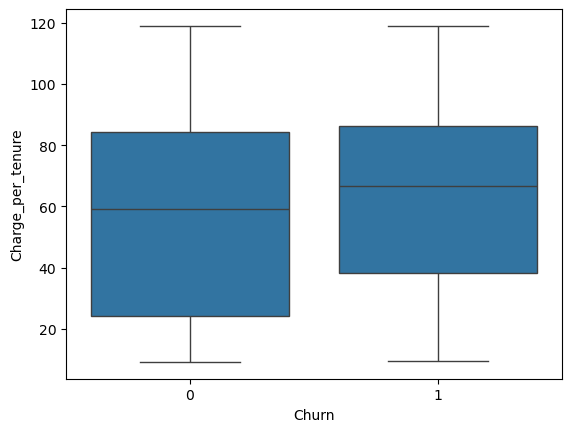

In [31]:
sns.boxplot(x=df['Churn'], y=df['Charge_per_tenure'])
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         7032 non-null   int64   
 1   gender             7032 non-null   int64   
 2   SeniorCitizen      7032 non-null   int64   
 3   Partner            7032 non-null   int64   
 4   Dependents         7032 non-null   int64   
 5   tenure             7032 non-null   int64   
 6   PhoneService       7032 non-null   int64   
 7   MultipleLines      7032 non-null   int64   
 8   InternetService    7032 non-null   int64   
 9   OnlineSecurity     7032 non-null   int64   
 10  OnlineBackup       7032 non-null   int64   
 11  DeviceProtection   7032 non-null   int64   
 12  TechSupport        7032 non-null   int64   
 13  StreamingTV        7032 non-null   int64   
 14  StreamingMovies    7032 non-null   int64   
 15  Contract           7032 non-null   int64   
 16  PaperlessBi

In [33]:
cat_column= [col for col in df.columns if df[col].dtype == 'category']
print(cat_column)

le = LabelEncoder()

for col in cat_column:
    df[col] = le.fit_transform(df[col])

['tenure_group']


In [34]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Churn', 'customerID'])
Y= df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('accuracy score:', accuracy_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))

accuracy score: 0.7874911158493249
Classification report:               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train,y_train)

y_pred_rf = rfc.predict(X_test)
print('accuracy acore after rfc:', accuracy_score(y_test, y_pred_rf))

accuracy acore after rfc: 0.7889125799573561


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
             "n_estimators": [50, 150, 200],
             "max_depth" : [5, 10, 20, None],
             }

Grd = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
Grd.fit(X_train, y_train)

print('Best param:', Grd.best_params_)

Best param: {'max_depth': 10, 'n_estimators': 50}


In [42]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rfc.fit(X_train,y_train)

y_pred_rf = rfc.predict(X_test)
print('accuracy acore after rfc:', accuracy_score(y_test, y_pred_rf))

accuracy acore after rfc: 0.7903340440653873


In [53]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
x_res, y_res =sm.fit_resample(X, Y)

x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(x_res_train, y_res_train)
print('Accuracy score:', accuracy_score(y_res_test, model.predict(x_res_test)))
print('Classification report:', classification_report(y_res_test, model.predict(x_res_test)))

Accuracy score: 0.9496221662468514
Classification report:               precision    recall  f1-score   support

           0       0.95      0.94      0.95       554
           1       0.95      0.96      0.95       637

    accuracy                           0.95      1191
   macro avg       0.95      0.95      0.95      1191
weighted avg       0.95      0.95      0.95      1191



In [55]:
print("END")

END


## Telecome Customer Churn